# Assignment 3

Name        : Chia Sin Liew  
Last edited : April 18th, 2022

The goal of this assignment is to solve multi-class classification problems, visualization of image samples, and analyzing errors.
- **Part A**: Multi-class Classification – Structured Data
- **Part B**: Multi-class Classification – Unstructured Data & Analysis of Model
Errors

## Part B: Multi-class Classification - Unstructured Data & Analysis of Errors

You will create a Logistic Regression classifier (using Scikit-Learn) to perform multi- class on the following unstructured dataset. You will also analyze the misclassifications error. 


**Dataset**:
The Fashion MNIST dataset contains 70,000 28 x 28 grayscale images of 10 fashion categories. The train set contains 60,000 images, and the test set contains 10,000 images.
You may directly load this dataset using the Keras API:
https://keras.io/api/datasets/fashion_mnist/

In [1]:
import pandas as pd
import os, sys 
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

### Pre-processing:
You will need to perform some pre-processing steps, i.e., reshaping and scaling.

- **Reshape the data:** The dimension of the training set is 60000 x 28 x 28 and test set is 10000 x 28 x 28.
Before you use this data for the ML model, you need to flatten each sample (i.e., 28 x 28 = 784) such the dimension of training and test set becomes:
    - 60000 x 784
    - 10000 x 784

In [2]:
# load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Reshape data 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Convert 1D vector into 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- **Scale the data:** use the min-max scaling technique, i.e., by divide the training & test data matrix by 255.0.

In [5]:
# Data Scaling - Min-Max Scaling
X_train = X_train/255.0
X_test = X_test/255.0

print("\nMin, max for X_train: %.2f, %.2f" % (X_train.min(), X_train.max()))
print("\nMin, max for X_test: %.2f, %.2f" % (X_test.min(), X_test.max()))


Min, max for X_train: 0.00, 1.00

Min, max for X_test: 0.00, 1.00


### Visualization:
Display 15 random images from each class as shown below. Below each image, show its label. See the labels and their names from this link: https://keras.io/api/datasets/fashion_mnist/


In [6]:
# get label names
map_label_desc = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# create a list of labels for desired images
desired_images = np.repeat(list(map_label_desc.keys()), 15, axis=0)


sample_all_class = []
chosen_indices = []

# Create a list of 15 images from each class
for image in desired_images:
    for i, y in enumerate(y_train):
        if (y == image and i not in chosen_indices):
            sample_all_class.append(X_train[i])
            chosen_indices.append(i)
            break

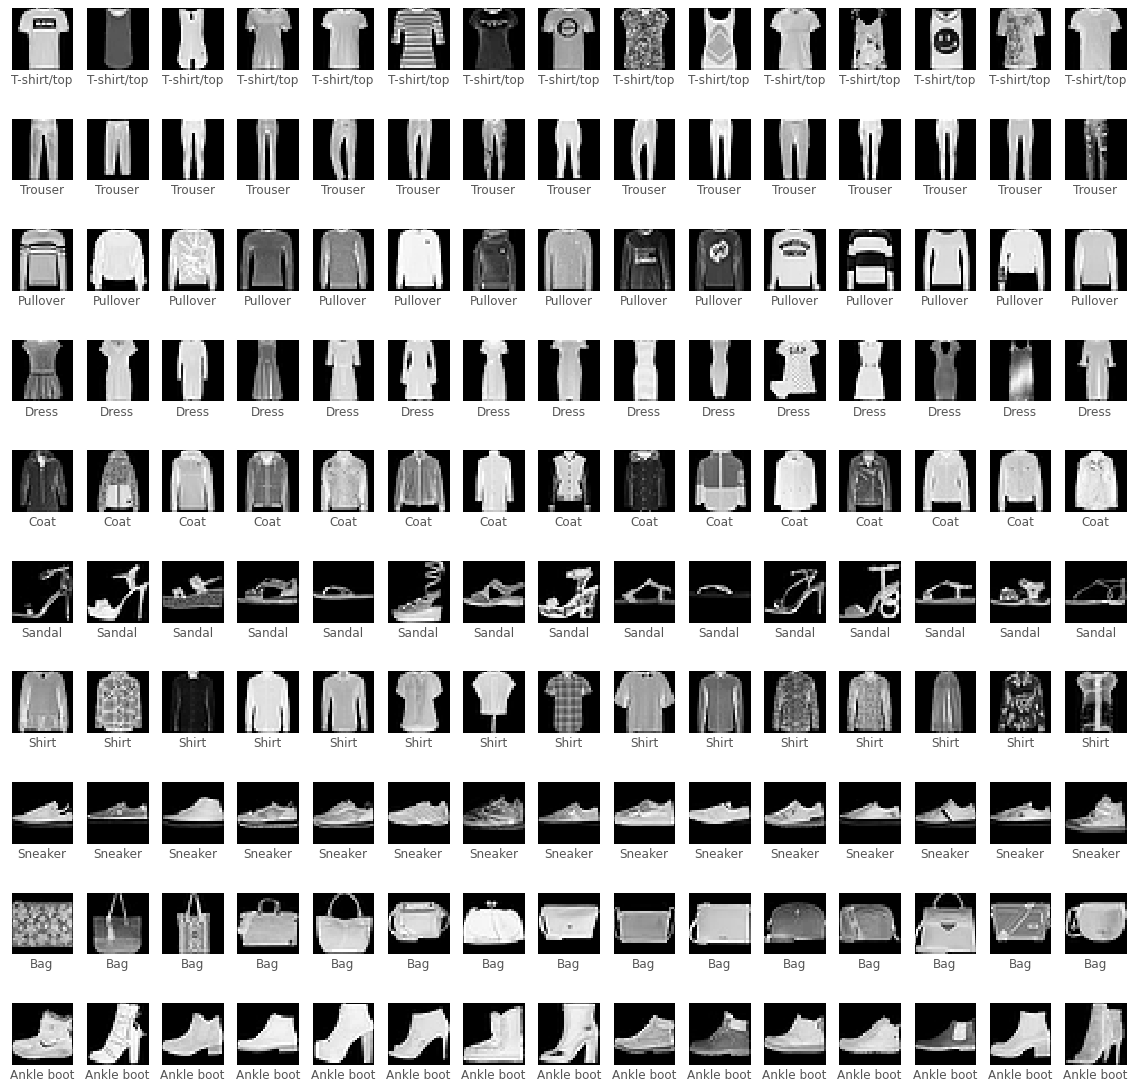

In [7]:
plt.figure(figsize=(20,20))
for i in range(len(sample_all_class)):
    plt.subplot(10, 15, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_all_class[i].reshape(28, 28), cmap='gray', interpolation="nearest")
    plt.xlabel(map_label_desc[desired_images[i]])
plt.show()

### Experiments:

- **Experiment 4)** Perform multi-class classification by optimally training a Logistic Regression classifier using the batch gradient descent algorithm. Report train accuracy, test accuracy, and test classification report. You MUST try to optimize the test performance of the model by using suitable values for the following hyperparameters of the Scikit-Learn LogisticRegression class: penalty, C, solver, max_iter. Following notebook could be useful:

##### Softmax Regression

###### Model selection by hyperparameter tuning (Softmax Regression)

In [8]:
%%time
warnings.filterwarnings("ignore")

param_grid_sm = {
    'solver': ['newton-cg', 'lbfgs'],
    'multi_class': ['multinomial'],
    'tol': [1e-3, 1e-4],
    'max_iter': [500, 1000, 2000],
    'C': [0.1, 0.5, 1, 10, 15, 50, 100]
}

lg_reg_sm = LogisticRegression()

lg_reg_sm_cv = GridSearchCV(lg_reg_sm, param_grid_sm, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_sm_cv.fit(X_train, y_train)

params_optimal_sm = lg_reg_sm_cv.best_params_

print("Best Score (f1 score): %f" % lg_reg_sm_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sm)
print("\n")

Fitting 3 folds for each of 84 candidates, totalling 252 fits


/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best Score (f1 score): 0.857633
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'lbfgs', 'tol': 0.001}


CPU times: user 9min 43s, sys: 56.2 s, total: 10min 39s
Wall time: 19h 1min 42s


###### Train the model (Softmax Regression)

In [11]:
%%time
log_reg_softmax = LogisticRegression(**params_optimal_sm)
# log_reg_softmax = LogisticRegression()

log_reg_softmax.fit(X_train, y_train)

CPU times: user 9min 23s, sys: 1min 2s, total: 10min 26s
Wall time: 1min 28s


LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial', tol=0.001)

###### Evaluate the model on test data (Softmax Regression)

In [12]:
print("\nNo. of iteration: ", log_reg_softmax.n_iter_)

y_train_predicted = log_reg_softmax.predict(X_train)

print("\nTraining Accuracy: ", np.mean(y_train_predicted == y_train))

y_test_predicted = log_reg_softmax.predict(X_test)

print("\nTest Accuracy: ", np.mean(y_test_predicted == y_test))

print("\nTest Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report: ")
print(classification_report(y_test, y_test_predicted))


No. of iteration:  [500]

Training Accuracy:  0.8729333333333333

Test Accuracy:  0.8458

Test Confusion Matrix: 
[[810   1  16  52   4   4 103   0  10   0]
 [  3 955   3  27   6   0   4   0   2   0]
 [ 24   3 738  12 125   1  83   1  13   0]
 [ 27  12  15 873  28   0  39   0   6   0]
 [  0   1 110  38 761   0  81   0   9   0]
 [  1   0   0   1   0 923   0  49   4  22]
 [135   1 123  40 103   1 572   0  25   0]
 [  0   0   0   0   0  29   0 942   0  29]
 [  6   1   5  11   2   4  23   6 942   0]
 [  0   1   0   0   0  15   0  41   1 942]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1

- Visualize a set of at least **20** misclassified test samples and their predicted probabilities for the following two classes **(class 5: Sandal and class 7: Sneaker)**. 

First, store the misclassified test samples and their predicted probabilities for the two classes in four lists. Then, use the lists for visualization. The misclassified test images and their predicted probabilities should be displayed in a grid.

In [143]:
# get misclassfied Sandal (class 5) & Sneaker (class 7) only
wanted_class = {5, 7}

# get y test probabilities
y_test_scores = log_reg_softmax.predict_proba(X_test)[:, 1]

# plot_images = np.repeat([5, 7], 20, axis=0)

plot_indices = []
sandal_plots = []
sneaker_plots = []
sandal_labels = []
sneaker_labels = []


for i, y_pred in enumerate(y_test_predicted):
    if (y_pred != y_test[i] and y_pred in wanted_class and i not in plot_indices):
        if ( y_pred  == 5 and len(sandal_plots) < 20 ):
            sandal_plots.append(X_test[i])
            sandal_labels.append(y_scores[i])
            plot_indices.append(i)
        elif ( y_pred == 7 and len(sneaker_plots) < 20 ):
            sneaker_plots.append(X_test[i])
            sneaker_labels.append(y_scores[i])
            plot_indices.append(i)


******************************************************Sandal******************************************************


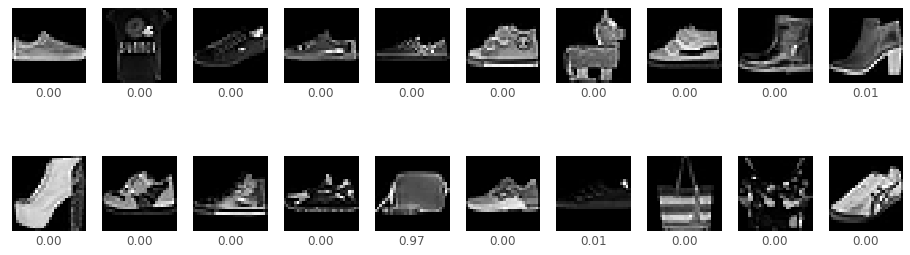


*****************************************************Sneaker******************************************************


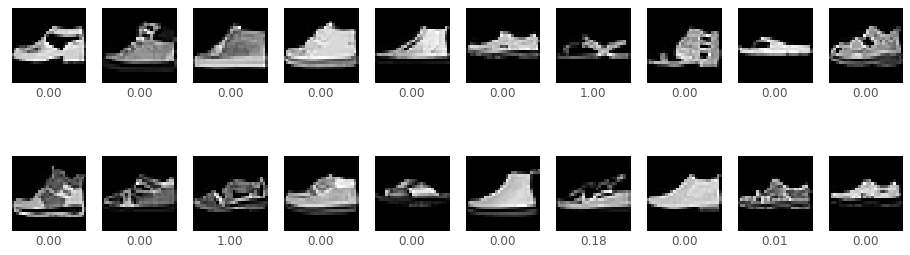

In [144]:
plt.figure(figsize=(16,5))
print('{:*^114}'.format('Sandal'))
for i in range(len(sandal_plots)):
    plt.subplot(2, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sandal_plots[i].reshape(28, 28), cmap='gray', interpolation="nearest")
    plt.xlabel("%.2f" % sandal_labels[i])
plt.show()
plt.figure(figsize=(16,5))
print('\n{:*^114}'.format('Sneaker'))
for i in range(len(sneaker_plots)):
    plt.subplot(2, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sneaker_plots[i].reshape(28, 28), cmap='gray', interpolation="nearest")
    plt.xlabel("%.2f" % sneaker_labels[i])
plt.show()

- **Q-3)** For each set of misclassified images, select at least 2 images from each class with predicted probabilities less than 0.15 and explain why your model failed to make accurate predictions on these samples. Copy the images in your report followed by your explanation, as shown below.

In [146]:
plot_indices

[12,
 23,
 68,
 107,
 316,
 441,
 531,
 671,
 722,
 852,
 902,
 925,
 946,
 993,
 1079,
 1108,
 1300,
 1471,
 1501,
 1513,
 1522,
 1567,
 1617,
 1632,
 1797,
 1817,
 1825,
 1907,
 1953,
 2399,
 2591,
 2700,
 2883,
 3004,
 3109,
 3123,
 3234,
 3445,
 3466,
 3733]

In [150]:
print("Real: ", y_test[993])
print("Predicted: ", y_test_predicted[993])

Real:  5
Predicted:  7


Text(0.5, 0, '0.00')

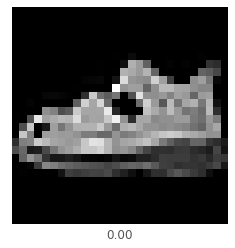

In [151]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_test[993].reshape(28, 28), cmap='gray', interpolation="nearest")
plt.xlabel("%.2f" % y_test_scores[993])

In [152]:
print("Real: ", y_test[671])
print("Predicted: ", y_test_predicted[671])

Real:  7
Predicted:  5


Text(0.5, 0, '0.00')

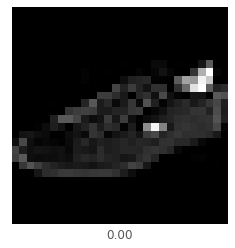

In [153]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_test[671].reshape(28, 28), cmap='gray', interpolation="nearest")
plt.xlabel("%.2f" % y_test_scores[671])

In [154]:
print("Real: ", y_test[3466])
print("Predicted: ", y_test_predicted[3466])

Real:  0
Predicted:  5


Text(0.5, 0, '0.00')

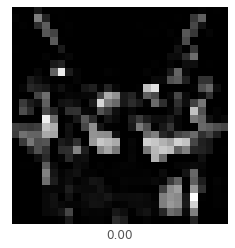

In [155]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_test[3466].reshape(28, 28), cmap='gray', interpolation="nearest")
plt.xlabel("%.2f" % y_test_scores[3466])

In [163]:
print("Real: ", y_test[23])
print("Predicted: ", y_test_predicted[23])

Real:  9
Predicted:  7


Text(0.5, 0, '0.00')

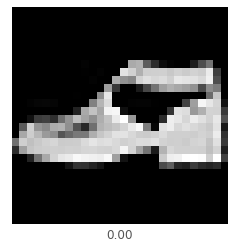

In [164]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_test[23].reshape(28, 28), cmap='gray', interpolation="nearest")
plt.xlabel("%.2f" % y_test_scores[23])